## Building a CNN using Keras

### Dataset Fashion MNIST

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

### Data Preparation

In [4]:
x=pd.read_csv("fashion-mnist.csv")
x.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_=np.array(x)
X=X_[:,1:]
X=X/255.0
y=X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [8]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [11]:
X_train=X.reshape((-1,28,28,1))
Y_train=np_utils.to_categorical(y)
print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [13]:
import matplotlib.pyplot as plt

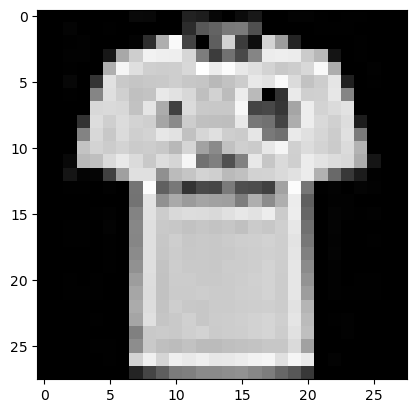

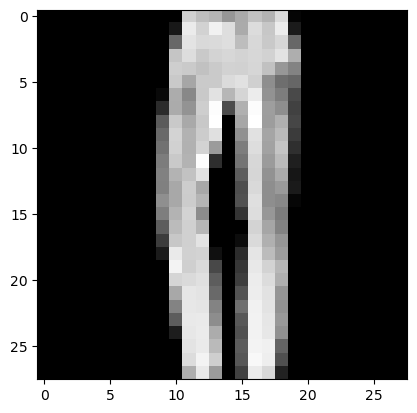

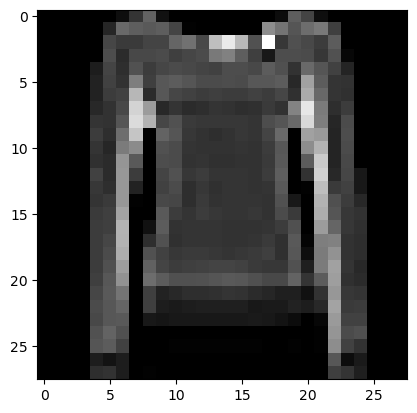

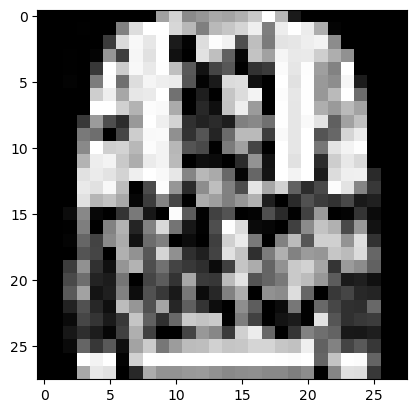

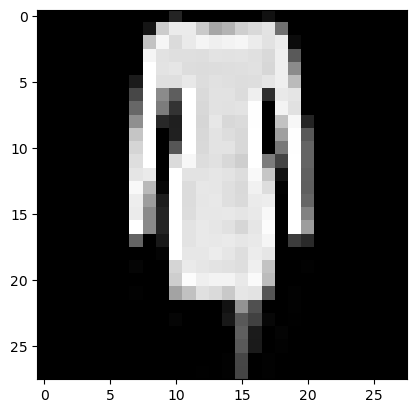

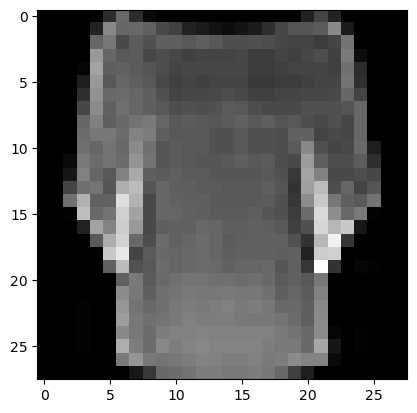

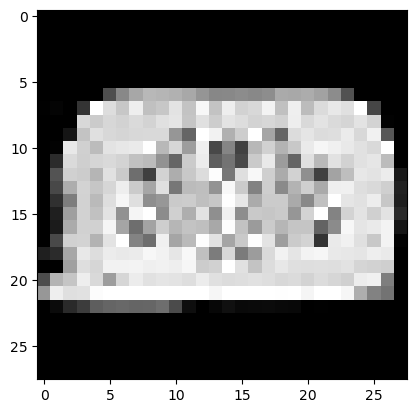

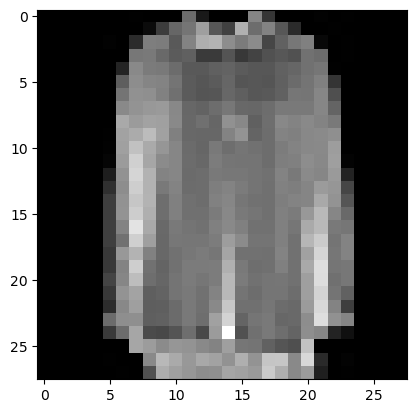

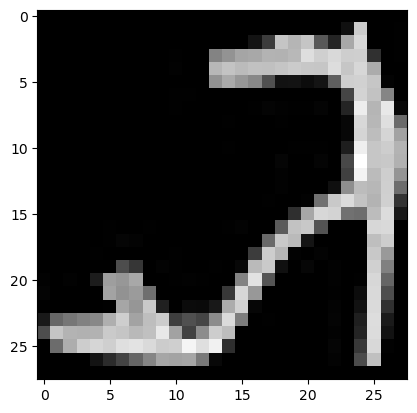

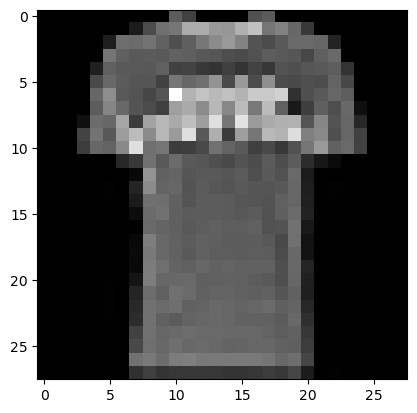

In [16]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

### CNN Model

In [22]:
#MNIST Data-10 classes(0 to 9)
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu')) #RF=5x5
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu')) #RF=7x7
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=128,validation_split=0.20)

Epoch 1/20
63/63 [==============================] - 8s 87ms/step - loss: 1.1890 - accuracy: 0.5874 - val_loss: 0.7179 - val_accuracy: 0.7465
Epoch 2/20
63/63 [==============================] - 5s 80ms/step - loss: 0.6640 - accuracy: 0.7462 - val_loss: 0.5700 - val_accuracy: 0.7930
Epoch 3/20
63/63 [==============================] - 6s 88ms/step - loss: 0.5796 - accuracy: 0.7750 - val_loss: 0.5544 - val_accuracy: 0.7870
Epoch 4/20
63/63 [==============================] - 5s 84ms/step - loss: 0.5206 - accuracy: 0.8006 - val_loss: 0.4629 - val_accuracy: 0.8370
Epoch 5/20
63/63 [==============================] - 5s 81ms/step - loss: 0.4732 - accuracy: 0.8261 - val_loss: 0.4620 - val_accuracy: 0.8340
Epoch 6/20
63/63 [==============================] - 5s 86ms/step - loss: 0.4340 - accuracy: 0.8403 - val_loss: 0.4441 - val_accuracy: 0.8335
Epoch 7/20
63/63 [==============================] - 5s 84ms/step - loss: 0.3933 - accuracy: 0.8554 - val_loss: 0.4147 - val_accuracy: 0.8465
Epoch 8/20
63

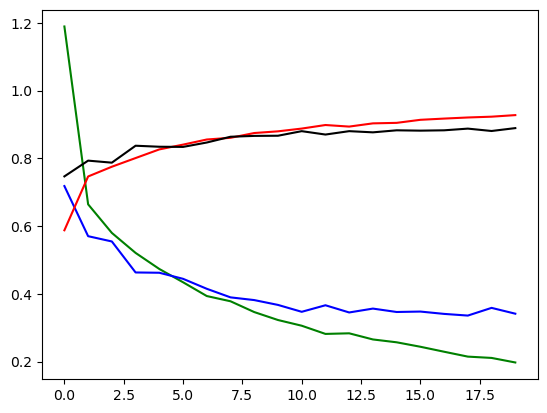

In [26]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()